<a href="https://colab.research.google.com/github/XcEland/Predicting-Probability-of-Default/blob/main/defaultModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import ydata_profiling as yp
# from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/datasets/data_science_competition_2024.csv')
dataset = df.copy()

In [5]:
dataset.head()

Unnamed: 0                               loan_id  gender disbursemet_date  \
0           0  8d05de78-ff32-46b1-aeb5-b3190f9c158a  female       2022 10 29   
1           1  368bf756-fcf2-4822-9612-f445d90b485b   other       2020 06 06   
2           2  6e3be39e-49b5-45b5-aab6-c6556de53c6f   other       2023 09 29   
3           3  191c62f8-2211-49fe-ba91-43556b307871  female       2022 06 22   
4           4  477cd8a1-3b01-4623-9318-8cd6122a8346    male       2023 02 08   

  currency   country     sex  is_employed      job    location  ...  \
0      USD  Zimbabwe  female         True  Teacher  Beitbridge  ...   
1      USD  Zimbabwe   other         True  Teacher      Harare  ...   
2      USD  Zimbabwe   other         True    Nurse       Gweru  ...   
3      USD  Zimbabwe  female         True   Doctor      Rusape  ...   
4      USD  Zimbabwe    male         True    Nurse    Chipinge  ...   

   number_of_defaults  outstanding_balance  interest_rate  age  \
0                   0         48653.011473           0.22   37   
1                   2         28752.062237           0.20   43   
2                   1         44797.554126           0.22   43   
3                   0         35681.496413           0.23   47   
4                   0         34156.055882           0.20   42   

   number_of_defaults.1  remaining term       salary  marital_status age.1  \
0                     0              47  3230.038869         married    37   
1                     2              62  3194.139103          single    43   
2                     1              57  3330.826656         married    43   
3                     0              42  2246.797020        divorced    47   
4                     0              45  2310.858441         married    42   

       Loan Status  
0  Did not default  
1  Did not default  
2  Did not default  
3  Did not default  
4  Did not default  

[5 rows x 21 columns]

In [6]:
dataset.describe()

Unnamed: 0    loan_amount  number_of_defaults  outstanding_balance  \
count  100000.000000  100000.000000       100000.000000        100000.000000   
mean    49999.500000   31120.000000            0.441970         36964.909763   
std     28867.657797   15895.093631            0.688286         10014.758477   
min         0.000000    1000.000000            0.000000             0.000000   
25%     24999.750000   21000.000000            0.000000         29625.227472   
50%     49999.500000   31000.000000            0.000000         35063.852394   
75%     74999.250000   40000.000000            1.000000         42133.388817   
max     99999.000000  273000.000000            2.000000        150960.000000   

       interest_rate           age  number_of_defaults.1         salary  \
count  100000.000000  100000.00000         100000.000000  100000.000000   
mean        0.210435      43.57069              0.441970    2781.804324   
std         0.018725       4.86376              0.688286     696.450055   
min         0.100000      21.00000              0.000000     250.000000   
25%         0.200000      40.00000              0.000000    2273.929349   
50%         0.210000      44.00000              0.000000    2665.441567   
75%         0.220000      47.00000              1.000000    3146.577655   
max         0.300000      65.00000              2.000000   10000.000000   

              age.1  
count  100000.00000  
mean       43.57069  
std         4.86376  
min        21.00000  
25%        40.00000  
50%        44.00000  
75%        47.00000  
max        65.00000

In [7]:
dataset.isna().sum()

Unnamed: 0                 0
loan_id                    0
gender                     0
disbursemet_date           0
currency                   0
country                  100
sex                        0
is_employed                0
job                     4136
location                 595
loan_amount                0
number_of_defaults         0
outstanding_balance        0
interest_rate              0
age                        0
number_of_defaults.1       0
remaining term             0
salary                     0
marital_status             0
age.1                      0
Loan Status                0
dtype: int64

In [ ]:
profile = ProfileReport(dataset, title="Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   loan_id               100000 non-null  object 
 2   gender                100000 non-null  object 
 3   disbursemet_date      100000 non-null  object 
 4   currency              100000 non-null  object 
 5   country               99900 non-null   object 
 6   sex                   100000 non-null  object 
 7   is_employed           100000 non-null  bool   
 8   job                   95864 non-null   object 
 9   location              99405 non-null   object 
 10  loan_amount           100000 non-null  float64
 11  number_of_defaults    100000 non-null  int64  
 12  outstanding_balance   100000 non-null  float64
 13  interest_rate         100000 non-null  float64
 14  age                   100000 non-null  int64  
 15  n

<Axes: xlabel='loan_amount'>

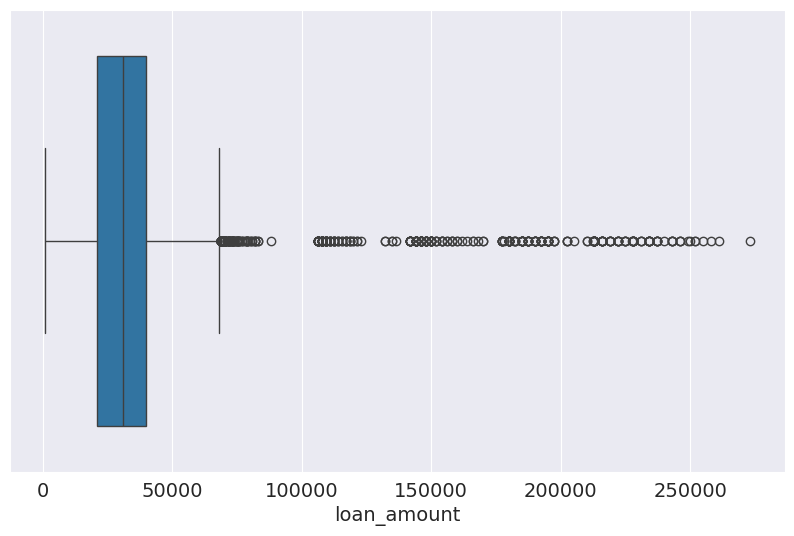

In [ ]:
sns.boxplot(x=dataset['loan_amount'])

In [ ]:
sum_values = dataset[dataset['loan_amount'] > 75000].shape[0]
print("Sum of target values greater than 50000:", sum_values)

Sum of target values greater than 50000: 315


In [ ]:
##drop rows based on condition
dataset.drop(dataset[dataset.loan_amount > 75000].index, inplace=True)

<Axes: xlabel='loan_amount'>

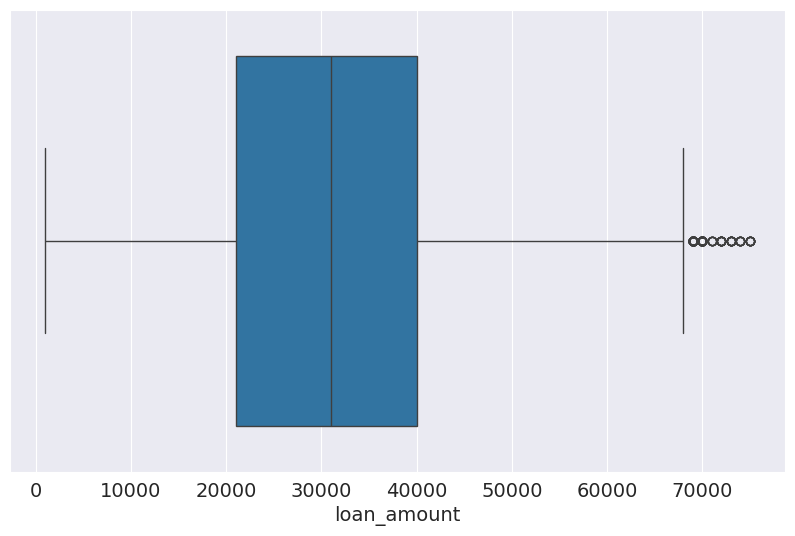

In [ ]:
sns.boxplot(x=dataset['loan_amount'])

<Axes: xlabel='salary'>

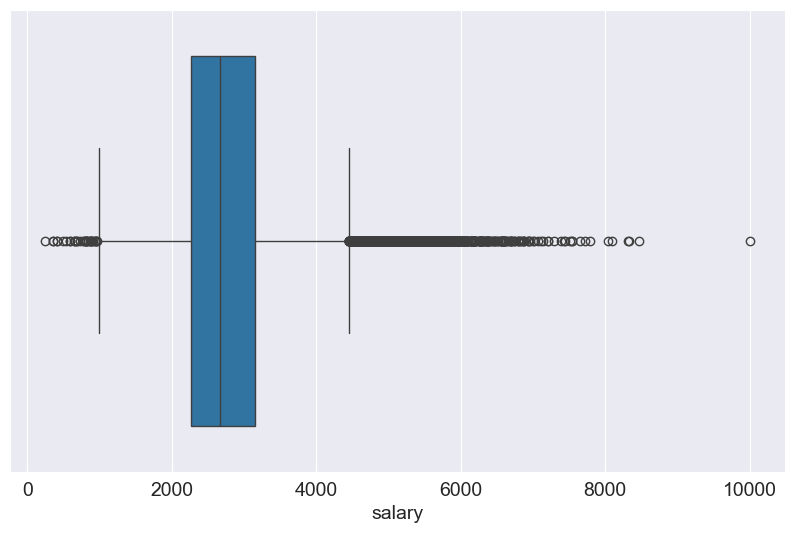

In [ ]:
sns.boxplot(x=dataset['salary'])

In [ ]:
sum_values = dataset[dataset['salary'] > 4500].shape[0]
print("Sum of target values greater than 50000:", sum_values)

Sum of target values greater than 50000: 2353


<Axes: xlabel='outstanding_balance'>

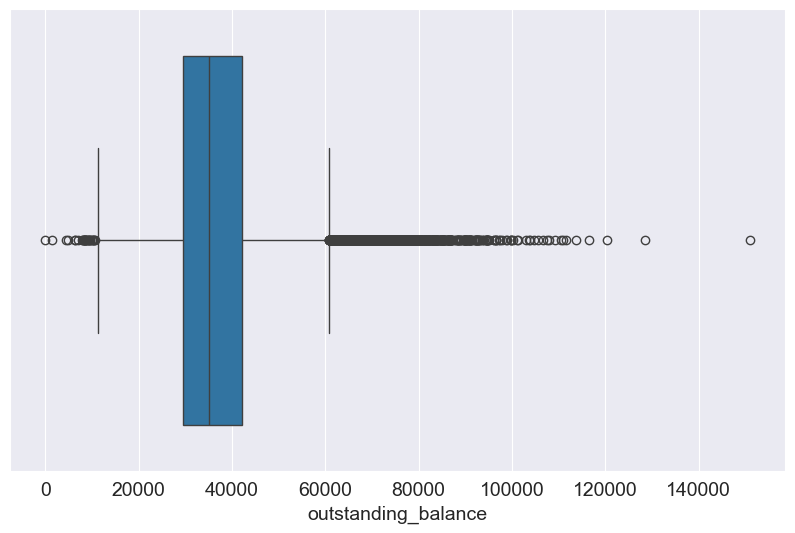

In [ ]:
sns.boxplot(x=dataset['outstanding_balance'])

In [ ]:
sum_values = dataset[dataset['outstanding_balance'] > 60000].shape[0]
print("Sum of target values greater than 50000:", sum_values)

Sum of target values greater than 50000: 3047


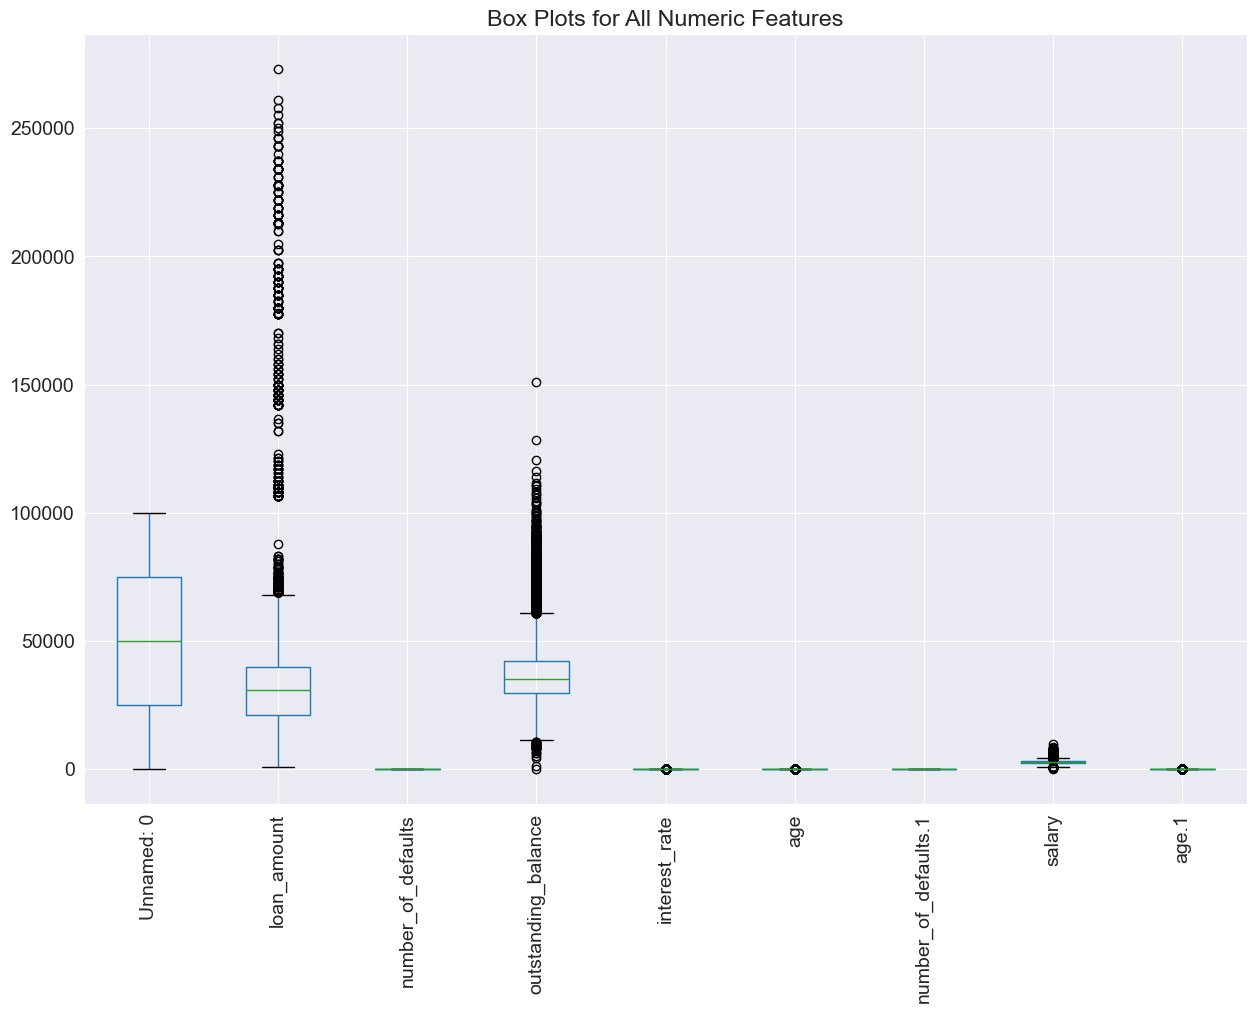

In [ ]:
# Select only numeric columns
numeric_features = dataset.select_dtypes(include=[float, int])

# Create box plots for all numeric features
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
numeric_features.boxplot()
plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap
plt.title('Box Plots for All Numeric Features')
plt.show()

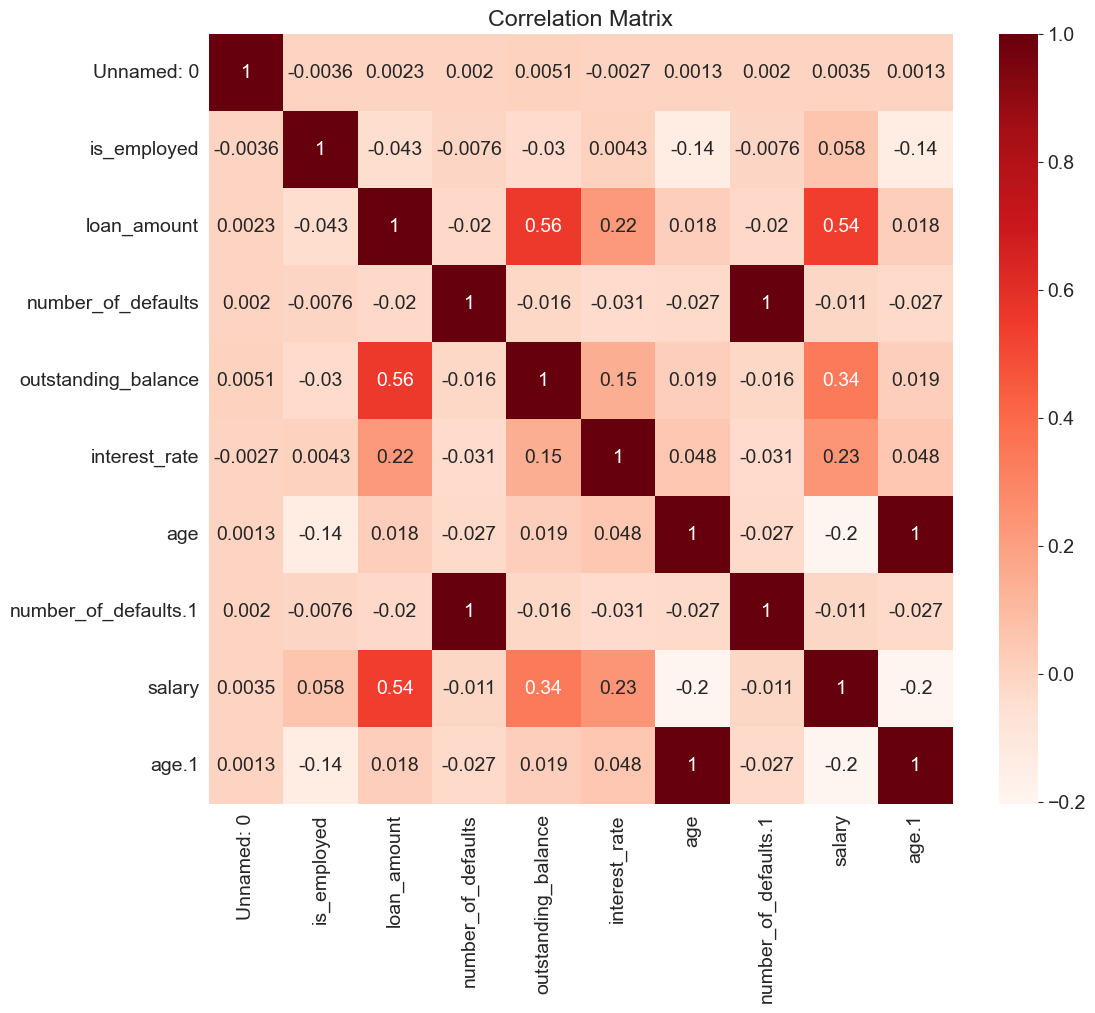

In [ ]:
#correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Check if 'age' and 'age.1' columns are duplicates
if 'age' in dataset.columns and 'age.1' in dataset.columns:
    are_duplicates = dataset['age'].equals(dataset['age.1'])
    if are_duplicates:
        print("The columns 'age' and 'age.1' are duplicates.")
    else:
        print("The columns 'age' and 'age.1' are not duplicates.")

The columns 'age' and 'age.1' are duplicates.


In [ ]:
# Check if 'age' and 'age.1' columns are duplicates
if 'number_of_defaults' in dataset.columns and 'number_of_defaults.1' in dataset.columns:
    are_duplicates = dataset['age'].equals(dataset['age.1'])
    if are_duplicates:
        print("The columns 'age' and 'age.1' are duplicates.")
    else:
        print("The columns 'age' and 'age.1' are not duplicates.")

The columns 'age' and 'age.1' are duplicates.


In [ ]:
dataset.drop(columns=['Unnamed: 0','loan_id','currency','country','age.1','number_of_defaults.1' ], inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   disbursemet_date     100000 non-null  object 
 2   sex                  100000 non-null  object 
 3   is_employed          100000 non-null  bool   
 4   job                  95864 non-null   object 
 5   location             99405 non-null   object 
 6   loan_amount          100000 non-null  float64
 7   number_of_defaults   100000 non-null  int64  
 8   outstanding_balance  100000 non-null  float64
 9   interest_rate        100000 non-null  float64
 10  age                  100000 non-null  int64  
 11  remaining term       100000 non-null  object 
 12  salary               100000 non-null  float64
 13  marital_status       100000 non-null  object 
 14  Loan Status          100000 non-null  object 
dtypes: bool(1), float6

using one hot encoding for the target "Loan Status"

In [ ]:
dataset['Loan Status'] = df['Loan Status'].map({'Defaulted': 1, 'Did not default': 0})

In [ ]:
dataset.head()

gender disbursemet_date     sex  is_employed      job    location  \
0  female       2022 10 29  female         True  Teacher  Beitbridge   
1   other       2020 06 06   other         True  Teacher      Harare   
2   other       2023 09 29   other         True    Nurse       Gweru   
3  female       2022 06 22  female         True   Doctor      Rusape   
4    male       2023 02 08    male         True    Nurse    Chipinge   

   loan_amount  number_of_defaults  outstanding_balance  interest_rate  age  \
0      39000.0                   0         48653.011473           0.22   37   
1      27000.0                   2         28752.062237           0.20   43   
2      35000.0                   1         44797.554126           0.22   43   
3      24000.0                   0         35681.496413           0.23   47   
4      19000.0                   0         34156.055882           0.20   42   

  remaining term       salary marital_status  Loan Status  
0             47  3230.038869        married            0  
1             62  3194.139103         single            0  
2             57  3330.826656        married            0  
3             42  2246.797020       divorced            0  
4             45  2310.858441        married            0

In [ ]:
dataset = dataset.select_dtypes(include=[float, int])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99685 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amount          99685 non-null  float64
 1   number_of_defaults   99685 non-null  int64  
 2   outstanding_balance  99685 non-null  float64
 3   interest_rate        99685 non-null  float64
 4   age                  99685 non-null  int64  
 5   salary               99685 non-null  float64
 6   Loan Status          99685 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 6.1 MB


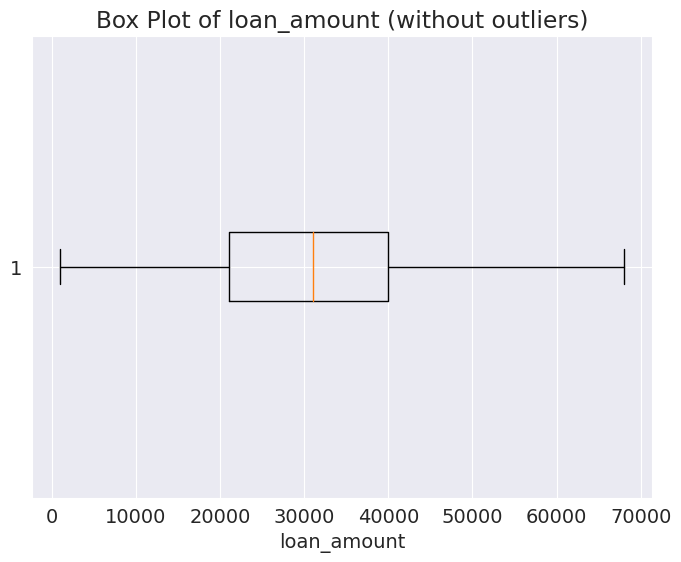

In [ ]:
def remove_outliers_and_plot(dataset, feature_name, threshold=1.5):
    # Calculate quartiles and IQR
    Q1 = dataset[feature_name].quantile(0.25)
    Q3 = dataset[feature_name].quantile(0.75)
    IQR = Q3 - Q1

    # Determine outlier boundaries
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Filter outliers
    dataset = dataset[(dataset[feature_name] >= lower_bound) & (dataset[feature_name] <= upper_bound)]

    # Plot box plot without outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(dataset[feature_name], vert=False)
    plt.title(f'Box Plot of {feature_name} (without outliers)')
    plt.xlabel(feature_name)
    plt.show()

remove_outliers_and_plot(dataset, 'loan_amount')

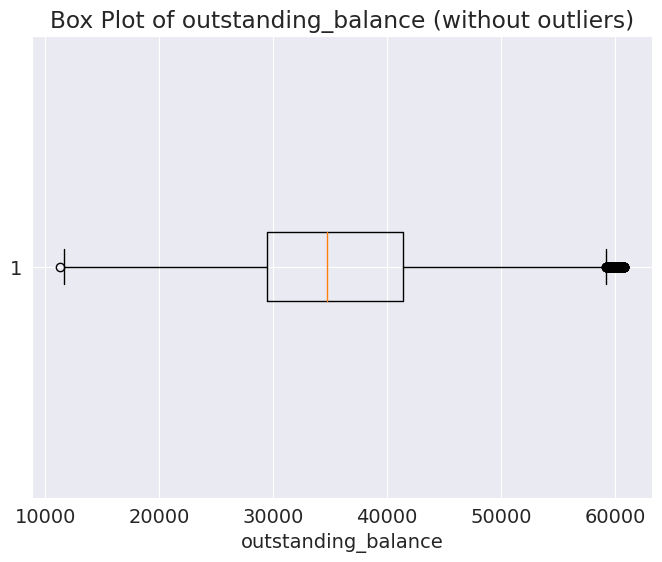

In [ ]:
remove_outliers_and_plot(dataset, 'outstanding_balance')

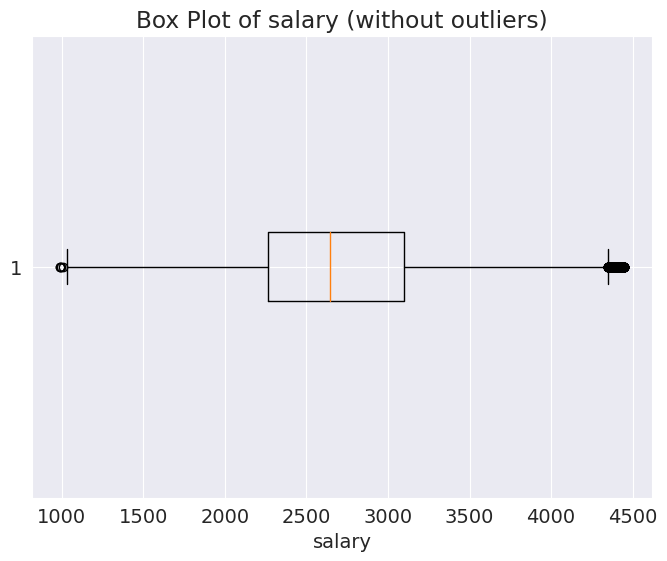

In [ ]:
remove_outliers_and_plot(dataset, 'salary')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99685 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amount          99685 non-null  float64
 1   number_of_defaults   99685 non-null  int64  
 2   outstanding_balance  99685 non-null  float64
 3   interest_rate        99685 non-null  float64
 4   age                  99685 non-null  int64  
 5   salary               99685 non-null  float64
 6   Loan Status          99685 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 6.1 MB


## Splitting the dataset into the Training set and Test set

Remove outliers

In [ ]:
X = dataset.drop(columns=['Loan Status']).values
y = y = dataset['Loan Status'].values

In [ ]:
X

array([[3.90000000e+04, 0.00000000e+00, 4.86530115e+04, 2.20000000e-01,
        3.70000000e+01, 3.23003887e+03],
       [2.70000000e+04, 2.00000000e+00, 2.87520622e+04, 2.00000000e-01,
        4.30000000e+01, 3.19413910e+03],
       [3.50000000e+04, 1.00000000e+00, 4.47975541e+04, 2.20000000e-01,
        4.30000000e+01, 3.33082666e+03],
       ...,
       [4.80000000e+04, 0.00000000e+00, 3.42662241e+04, 2.30000000e-01,
        4.30000000e+01, 3.53559976e+03],
       [3.60000000e+04, 2.00000000e+00, 7.15460249e+04, 2.20000000e-01,
        4.90000000e+01, 3.08240712e+03],
       [4.60000000e+04, 0.00000000e+00, 4.31411029e+04, 2.10000000e-01,
        4.70000000e+01, 2.67076653e+03]])

In [ ]:
y.value_counts()

Loan Status
0    84881
1    14804
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print('X.shape :', X.shape)
print('X_train.shape :', X_train.shape)
print('y_train.shape :', y_train.shape)
print('X_test.shape :', X_test.shape)
print('y_test.shape :', y_test.shape)

X.shape : (99685, 6)
X_train.shape : (74763, 6)
y_train.shape : (74763,)
X_test.shape : (24922, 6)
y_test.shape : (24922,)


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test

In [ ]:
print(classifier.coef_.tolist())

[[-0.1982198234264173, 0.3762109840814044, 0.001148651347687951, -0.42086564414160066, -0.4812056950782397, -0.19042232764250325]]


In [ ]:
classifier.classes_

array([0, 1])

In [ ]:
train_preds = classifier.predict(X_train)
print(np.concatenate((train_preds.reshape(len(train_preds),1), y_train.reshape(len(y_train),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, train_preds)
print(cm)
accuracy_score(y_train, train_preds)

[[63394   239]
 [ 9365  1765]]


0.8715407353905007

In [ ]:
train_probs = classifier.predict_proba(X_train)
train_probs

array([[0.18258068, 0.81741932],
       [0.78013579, 0.21986421],
       [0.87725692, 0.12274308],
       ...,
       [0.6625285 , 0.3374715 ],
       [0.96911498, 0.03088502],
       [0.94300491, 0.05699509]])

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = classifier.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 87.15%


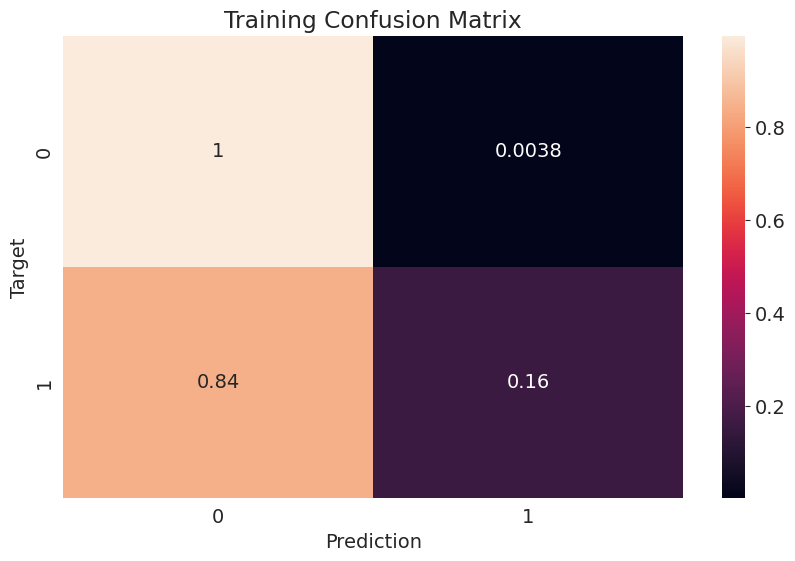

In [ ]:
train_preds = predict_and_plot(X_train, y_train, 'Training')

Accuracy: 87.19%


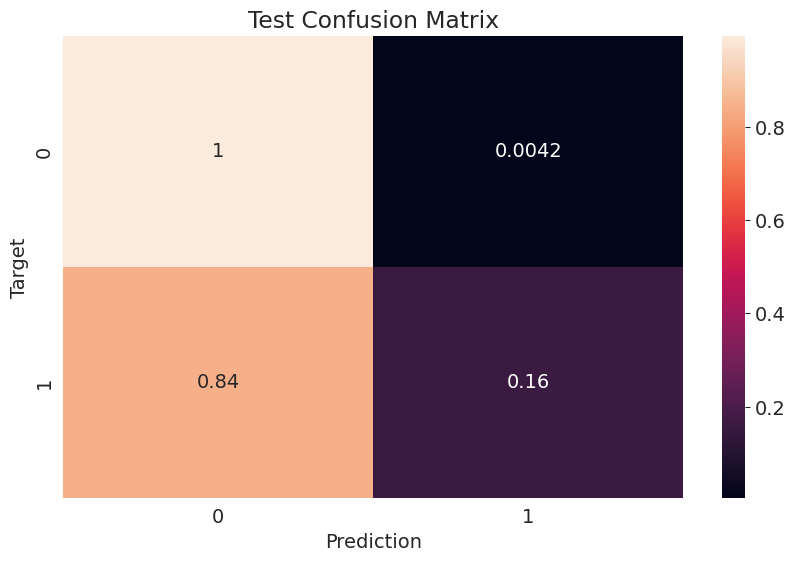

In [ ]:
test_preds = predict_and_plot(X_test, y_test, 'Test')